In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the DuckDB in project root (because notebook is inside /notebooks)
con = duckdb.connect("../churn.duckdb")

# Confirm we are in the right DB
print("Tables:", con.execute("SHOW TABLES").fetchall())

df = con.execute("SELECT * FROM customers").df()
df.head()


Tables: [('customers',), ('customers_stg',)]


,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0


In [2]:
df.shape, df.dtypes


((10000, 32),
 customer_id                object
 gender                     object
 age                         int32
 country                    object
 city                       object
 customer_segment           object
 tenure_months               int32
 signup_channel             object
 contract_type              object
 monthly_logins              int32
 weekly_active_days          int32
 avg_session_time          float64
 features_used               int32
 usage_growth_rate         float64
 last_login_days_ago         int32
 monthly_fee               float64
 total_revenue             float64
 payment_method             object
 payment_failures            int32
 discount_applied             bool
 price_increase_last_3m       bool
 support_tickets             int32
 avg_resolution_time       float64
 complaint_type             object
 csat_score                float64
 escalations                 int32
 email_open_rate           float64
 marketing_click_rate      float64
 nps_s

In [3]:
# Missing values %
(df.isna().mean().sort_values(ascending=False) * 100).round(2).head(15)


customer_id            0.0
gender                 0.0
age                    0.0
country                0.0
city                   0.0
customer_segment       0.0
tenure_months          0.0
signup_channel         0.0
contract_type          0.0
monthly_logins         0.0
weekly_active_days     0.0
avg_session_time       0.0
features_used          0.0
usage_growth_rate      0.0
last_login_days_ago    0.0
dtype: float64

In [4]:
# Churn distribution
df["churn"].value_counts(), (df["churn"].value_counts(normalize=True) * 100).round(2)


(churn
 0    8979
 1    1021
 Name: count, dtype: int64,
 churn
 0    89.79
 1    10.21
 Name: proportion, dtype: float64)

In [5]:
num_cols = [
    "tenure_months","monthly_logins","weekly_active_days","avg_session_time","features_used",
    "usage_growth_rate","last_login_days_ago","monthly_fee","total_revenue","payment_failures",
    "support_tickets","avg_resolution_time","csat_score","escalations","email_open_rate",
    "marketing_click_rate","nps_score","referral_count"
]

summary = df.groupby("churn")[num_cols].mean().T
summary.columns = ["No_Churn(0)_avg", "Churn(1)_avg"]
summary["delta_churn_minus_nochurn"] = summary["Churn(1)_avg"] - summary["No_Churn(0)_avg"]
summary.sort_values("delta_churn_minus_nochurn", ascending=False).head(20)



,No_Churn(0)_avg,Churn(1)_avg,delta_churn_minus_nochurn
last_login_days_ago,9.382114,10.587659,1.205545
nps_score,19.071166,19.456415,0.385249
payment_failures,0.473995,0.738492,0.264497
features_used,4.986747,5.026445,0.039698
escalations,0.292349,0.309500,0.017152
email_open_rate,0.498711,0.507512,0.008801
usage_growth_rate,0.019157,0.021763,0.002606
support_tickets,1.206482,1.207640,0.001158
marketing_click_rate,0.253673,0.252713,-0.000960
referral_count,0.994654,0.970617,-0.024037


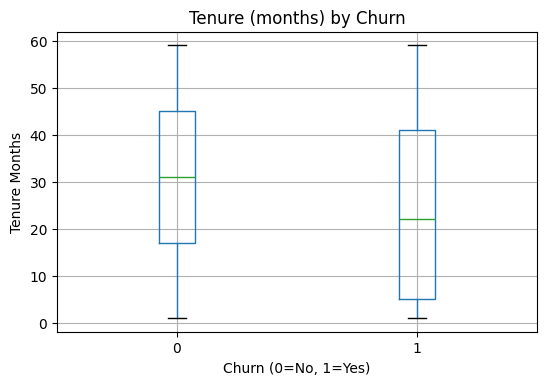

In [6]:
df.boxplot(column="tenure_months", by="churn", figsize=(6,4))
plt.title("Tenure (months) by Churn")
plt.suptitle("")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Tenure Months")
plt.show()


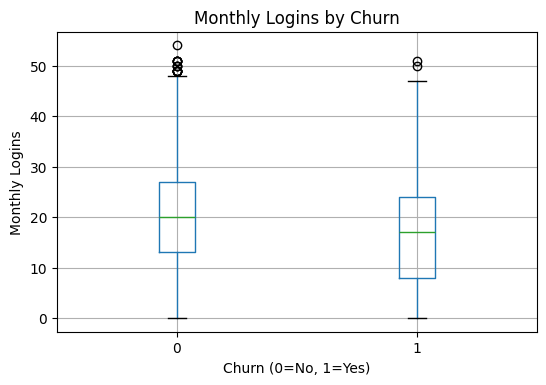

In [7]:
df.boxplot(column="monthly_logins", by="churn", figsize=(6,4))
plt.title("Monthly Logins by Churn")
plt.suptitle("")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Monthly Logins")
plt.show()


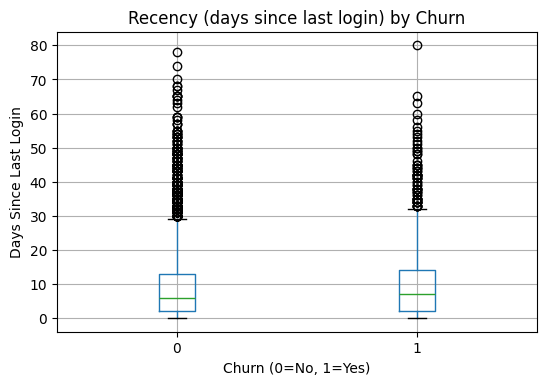

In [8]:
df.boxplot(column="last_login_days_ago", by="churn", figsize=(6,4))
plt.title("Recency (days since last login) by Churn")
plt.suptitle("")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Days Since Last Login")
plt.show()


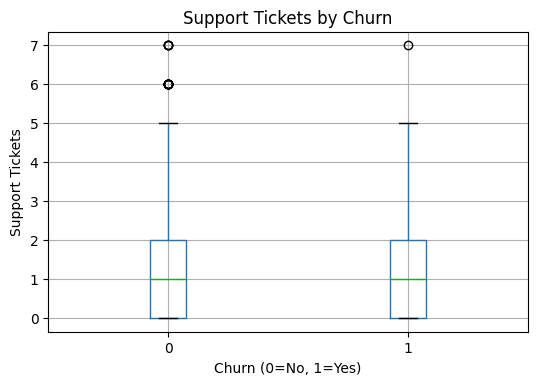

In [9]:
df.boxplot(column="support_tickets", by="churn", figsize=(6,4))
plt.title("Support Tickets by Churn")
plt.suptitle("")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Support Tickets")
plt.show()


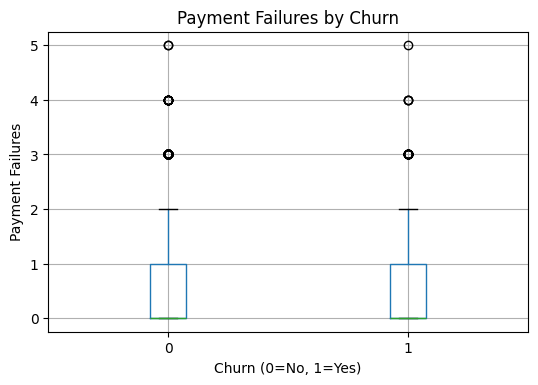

In [10]:
df.boxplot(column="payment_failures", by="churn", figsize=(6,4))
plt.title("Payment Failures by Churn")
plt.suptitle("")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Payment Failures")
plt.show()


In [11]:
tenure_bucket = pd.cut(
    df["tenure_months"],
    bins=[-1,5,11,23,47,999],
    labels=["0-5","6-11","12-23","24-47","48+"]
)

tenure_churn = df.groupby(tenure_bucket)["churn"].mean().mul(100).round(2).reset_index()
tenure_churn.columns = ["tenure_bucket","churn_rate_pct"]
tenure_churn


C:\Users\bharg\AppData\Local\Temp\ipykernel_17740\2095269183.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby(tenure_bucket)["churn"].mean().mul(100).round(2).reset_index()


,tenure_bucket,churn_rate_pct
0,0-5,32.48
1,6-11,8.49
2,12-23,8.61
3,24-47,7.76
4,48+,8.18


In [12]:
login_bucket = pd.cut(
    df["monthly_logins"],
    bins=[-1,8,20,999],
    labels=["Low (<=8)","Medium (9-20)","High (21+)"]
)

login_churn = df.groupby(login_bucket)["churn"].mean().mul(100).round(2).reset_index()
login_churn.columns = ["login_bucket","churn_rate_pct"]
login_churn


C:\Users\bharg\AppData\Local\Temp\ipykernel_17740\902421591.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  login_churn = df.groupby(login_bucket)["churn"].mean().mul(100).round(2).reset_index()


,login_bucket,churn_rate_pct
0,Low (<=8),19.60
1,Medium (9-20),9.09
2,High (21+),8.46


In [13]:
monthly_revenue_at_risk = df.loc[df["churn"] == 1, "monthly_fee"].sum()
total_revenue_at_risk = df.loc[df["churn"] == 1, "total_revenue"].sum()

churn_rate = df["churn"].mean() * 100

monthly_revenue_at_risk, total_revenue_at_risk, round(churn_rate, 2)


(np.float64(35300.0), np.float64(862640.0), np.float64(10.21))

In [14]:
high_risk = df[
    (df["last_login_days_ago"] >= 14) &
    (df["monthly_logins"] <= 8) &
    ((df["payment_failures"] >= 2) | (df["support_tickets"] >= 3) | (df["csat_score"] <= 3.0))
].copy()

high_risk.shape, high_risk["churn"].mean()


((200, 32), np.float64(0.205))